# **Frame the Problem and Look at the Big Picture**  

#### **1. Define the Objective in Business Terms**  

We were hired by a hospital that is having trouble diagnosing:
- Lung benign tissue cancer
- Lung adenocarcinoma cancer 
- Lung squamous cell carcinoma cancer
- Colon adenocarcinoma cancer
- Colon benign tissue cancer

in a timely matter. 

It is our goal to be able to create a supervised multi class classification model to tell the difference between these 5 classes and therefore help give a quick diagnosis.

Being able to classify these different cancers with better accuracy will greatly help the doctors make the proper diagnosis, and also will help the patients by giving them a more accurate diagnosis.

#### **2. How Will the Solution Be Used?**  

This model will be used by doctors to help diagnose their patients with better accuracy. This will lead to more patients being given the proper diagnosis.

#### **3. What Are the Current Solutions/Workarounds (If Any)?**  

Currently, the doctors go off of their own diagnosis, which is a problem because a lot of these cancers dont look all too much different from one another and the doctor may not be able to diagnose it perfectly everytime which could result in serious harm for the patients.


#### **4. How Should You Frame This Problem?**  

This is an image-based supervised multi class classification problem because we are trying to predict what class each image falls into. The model will be trained on the 25000 pictues that we have in our dataset.

#### **5. How Should Performance Be Measured? Is the Performance Measure Aligned with the Business Objective?**  
- Accuracy. This is alligned with the business objective because our classes are well balanced, and it would just be a simple number of correct predictions / number of total predictions.


#### **6. What Would Be the Minimum Performance Needed to Reach the Business Objective?**  
The minimum performance needed to reach the business objective would be better than what the doctors correct diagnosis rate. For this task, we will be aiming for 90% accuracy.


#### **7. What Are Comparable Problems? Can You Reuse (Personal or Readily Available) Experience or Tools?**  

There are plent of image based classification problems that have happened and are documented online. We also have a comparable problem that we went over in our machine learning class which is then the iris one. We also have the section on computer vision in the book that explains a lot about image based classification and how we can run a machine learning model on it.  

#### **8. Is Human Expertise Available?**  
For this project, I do not believe we have any other human expertise on this specific problem, however there are many people and resources out there that can help with image based classification.


#### **9. How Would You Solve the Problem Manually?**  

If solving this problem manually, one could:

1. **Resize and clean the images**  
   - Make sure all images are the same size (for example, 224x224 pixels).  
   - Adjust the brightness or contrast so that features are easier to see.

2. **Look for visual patterns using image filters**  
   - Detect colors or brightness levels to spot differences.

3. **Extract simple features from the images**  
   - Count how many bright or dark spots there are.  
   - Measure how "rough" or "smooth" the texture is using built-in functions.  

4. **Write rules to guess the class based on features**  
   - For example, if an image has many dark round spots and rough texture, it might be cancerous.  
   - These would be written using if-else statements in Python.

5. **Test it out**  
   - Run the code on a few test images.  
   - If the results aren’t good, change the thresholds or try new patterns.

#### **10. List the Assumptions You (or Others) Have Made So Far. Verify Assumptions if Possible.**  
- The images are all of the same size
- The samples come from an indpendent sample

# **Get the Data**

1. **List the data you need and how much you need**  
   To train an effective multiclass classification model for detecting and distinguishing between lung and colon cancer types, we required a large volume of histopathological image data. Specifically, we needed:
   - Thousands of labeled images for each of the following five classes:
     - Lung benign tissue  
     - Lung adenocarcinoma  
     - Lung squamous cell carcinoma  
     - Colon adenocarcinoma  
     - Colon benign tissue  

2. **Find and document where you can get that data**  
   The dataset used for this project is publicly available on Kaggle:  
   **Lung and Colon Cancer Histopathological Images Dataset**  
   URL: [Lung and Colon Cancer Data Set](https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images)  
   This dataset contains 25,000 high-resolution images (768x768 pixels) evenly distributed across the five cancer-related classes.
   

3. **Get access authorizations**  
   Access to the dataset was granted through Kaggle using an authenticated account. No special permissions or credentials were required.

In [11]:
# imports for project
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Lung and Colon Cancer Dataset

The dataset used in this project is designed for histopathological image classification of lung and colon cancer. It contains a total of **25,000 color images**, equally distributed across **five classes**. All images are high-resolution, with dimensions of **768 × 768 pixels**, and are stored in `.jpeg` format.

### 1. Dataset Structure

Inside the data folder directory:
- `colon_image_sets`
- `lung_image_sets`

Each of these subdirectories contains class-specific image folders as described below.

### 2. Colon Image Sets

Located under `data/colon_image_sets`, this subset consists of:

| Folder Name | Class Description | Number of Images |
|-------------|-------------------|------------------|
| `colon_aca` | Colon adenocarcinoma (malignant tissue) | 5,000 |
| `colon_n`   | Normal benign colon tissue               | 5,000 |

These images support classification between cancerous and non-cancerous colon tissues.

### 3. Lung Image Sets

Located under `data/lung_image_sets`, this subset includes:

| Folder Name | Class Description | Number of Images |
|-------------|-------------------|------------------|
| `lung_aca`  | Lung adenocarcinoma (malignant tissue)        | 5,000 |
| `lung_scc`  | Lung squamous cell carcinoma (malignant tissue) | 5,000 |
| `lung_n`    | Normal benign lung tissue                      | 5,000 |

This subset enables a more granular classification of lung cancers into two malignant types alongside normal lung tissues.

### 4. Key Dataset Properties

- **Balanced Classes**: Each of the five classes contains exactly 5,000 images, eliminating the need for manual class balancing.
- **Image Format**: All files are `.jpeg` images in RGB (3-channel) format.
- **Image Dimensions**: Each image is originally `768 × 768` pixels. Due to the large size, it is common to resize them (e.g.`224 × 224`) to reduce memory usage and training time.
- **Data Augmentation (Pre-applied)**: According to the authors, some of the images were generated using augmentation techniques. This should be considered when applying additional augmentation during model training.

In [ ]:
# Image Resizing to lower resolution for training
input_dir = 'data'
output_dir = 'resized_data'
target_size = (224, 224)

os.makedirs(output_dir, exist_ok=True)

def resize_images(input_dir, output_dir, target_size):
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):  
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_dir)
                output_path = os.path.join(output_dir, relative_path, file)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                try:
                    with Image.open(input_path) as img:
                        img = img.convert('RGB')

                        # Resize using anti-aliasing to retain quality
                        img = img.resize(target_size, Image.Resampling.LANCZOS)

                        # Save the resized image
                        img.save(output_path, format='JPEG')
                except Exception as e:
                    print(f"Failed to process {input_path}: {e}")

resize_images(input_dir, output_dir, target_size)

This script resizes all images in a given dataset directory to a specified target resolution (in this case, `224 × 224`) and saves them to a new directory while preserving the folder structure.

1. **Memory Efficiency**  
   The original histopathological images are `768 × 768` pixels, which are too large for efficient processing on most machines. Resizing reduces memory and computational load, enabling faster training.

2. **Standardization**  
   Neural networks expect input tensors of a fixed size. Common architectures are trained on image sizes like `224 × 224`, making it a standard choice.

## Splitting the data

In [ ]:
# Common settings
data_dir = 'resized_data'
img_height, img_width = 224, 224
batch_size = 32
seed = 42

# Load the 80% training split
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load the 20% (val + test) split
val_test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 25000 files belonging to 5 classes.
Using 20000 files for training.
Found 25000 files belonging to 5 classes.
Using 5000 files for validation.


In [3]:
# Split val_test_ds in half
val_batches = val_test_ds.cardinality().numpy() // 2
val_ds = val_test_ds.take(val_batches)
test_ds = val_test_ds.skip(val_batches)

In [4]:
print("Train batches:", train_ds.cardinality().numpy())
print("Validation batches:", val_ds.cardinality().numpy())
print("Test batches:", test_ds.cardinality().numpy())

Train batches: 625
Validation batches: 78
Test batches: 79


### Why We Performed a Train/Validation/Test Split

To ensure that our machine learning model for classifying lung and colon cancer images generalizes well to unseen data, we implemented a **three-way data split**:  
- **Training set** (80%)  
- **Validation set** (10%)  
- **Test set** (10%)

### Reasoning

1. **Training Set (80%)**  
   It would have been preferrable to use more for training set, but because we are working with a dataset of 25,0000 samples, I believe it would be more reasonable to follow the 80/20 rule, or rather in this case 80/10/10. 

2. **Validation Set (10%)**  
   The validation set is used during model training to:
   - Tune hyperparameters
   - Monitor for overfitting
   - Enable early stopping if performance starts to degrade
   Having a separate validation set ensures we make these decisions without biasing our final evaluation.

3. **Test Set (10%)**  
   The test set is held out entirely until the **final evaluation step**. It simulates how the model will perform on real-world, unseen data and gives us an **unbiased estimate** of its generalization performance.

### Train/Test + Cross-Validatioin?

While a simple train/test split might be acceptable for small-scale experiments, it presents several risks in larger projects:
- Not having to use the test set during hyperparameter training reduces the risk of data leakage. 
- There's no checkpoint to detect **overfitting** during training
- Using K-folds Cross Validation might cause computation overload especially working with CNN. 

An 80/10/10 split is a good split as working with 20,000 samples for training is a good amount for what we currently are working with. As for the validation set, from splitting the test set in half, we are able to get the validation set, making both sets a total of about 2,500 samples.

## Data Exploration

2025-04-15 22:05:34.202486: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


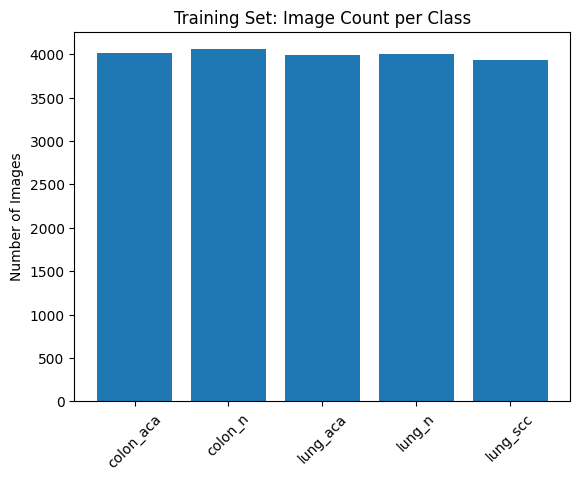

In [7]:
# Count labels in training set
class_names = train_ds.class_names
label_counts = {label: 0 for label in class_names}

for images, labels in train_ds.unbatch():
    label = class_names[labels.numpy()]
    label_counts[label] += 1

# Plot
plt.bar(label_counts.keys(), label_counts.values())
plt.title("Training Set: Image Count per Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

To verify class balance after splitting the data, we visualized the number of images per class in the training set.

The bar chart confirms that all five classes are evenly represented, with approximately 4,000 images each:

- `colon_aca`  
- `colon_n`  
- `lung_aca`  
- `lung_n`  
- `lung_scc`

This balance ensures that the model will not be biased toward any particular class during training, and no additional resampling or class weighting is necessary at this stage.

### **Comparing Images**

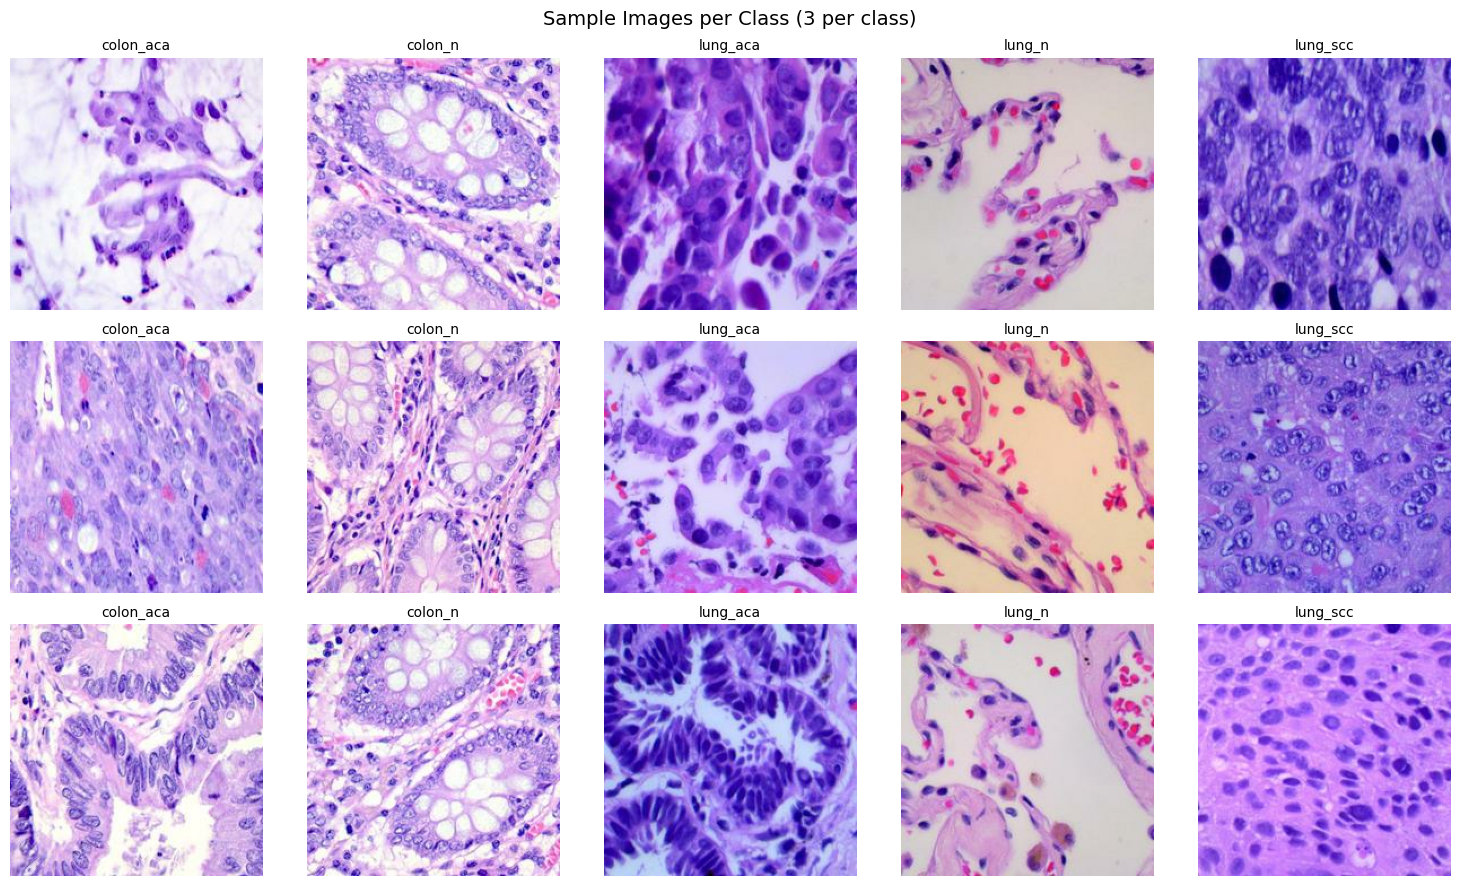

In [9]:
# Number of images to display per class
images_per_class = 3
class_names = train_ds.class_names

# Collect a batch and unbatch it so we can loop freely
all_images = []
all_labels = []

for images, labels in train_ds.take(1):
    all_images.extend(images.numpy())
    all_labels.extend(labels.numpy())

plt.figure(figsize=(15, 9))

for class_idx, class_name in enumerate(class_names):
    # Get indices of images for this class
    class_images = [img for img, label in zip(all_images, all_labels) if label == class_idx]
    for i in range(images_per_class):
        ax = plt.subplot(images_per_class, len(class_names), i * len(class_names) + class_idx + 1)
        plt.imshow(class_images[i].astype("uint8"))
        plt.title(class_name, fontsize=10)
        plt.axis("off")

plt.suptitle("Sample Images per Class (3 per class)", fontsize=14)
plt.tight_layout()
plt.show()


- **Class Label Integrity**: Each sample visually matches its expected class, indicating that the dataset is well-labeled.
- **Visual Distinction**: 
  - Benign tissue (`colon_n`, `lung_n`) displays more uniform structure and organization.
  - Malignant tissue (`colon_aca`, `lung_aca`, `lung_scc`) appears more disordered, with denser and irregular cell patterns.
- **Color and Staining**: Color tones (ranging from purples to pinks) are consistent within each class but varied enough across classes to support feature learning.
- **Image Quality**: All samples are clear and free of significant anamoloies, suggesting no immediate need for cleaning.

In [10]:
for images, _ in train_ds.take(1):
    print("Min pixel value:", tf.reduce_min(images).numpy())
    print("Max pixel value:", tf.reduce_max(images).numpy())

Min pixel value: 0.0
Max pixel value: 255.0


2025-04-15 23:09:06.325140: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


**NOTE:** This should be normalized during the data pipeline stage.

### **RGB Distribution**

Color is a important in histopathology images due to H&E staining, which highlights different tissue structures using purples, blues, and pinks.

This check ensures the model will learn from meaningful color patterns rather than noise. It also helps identify potential issues like overexposure or color imbalance, which could impact performance.

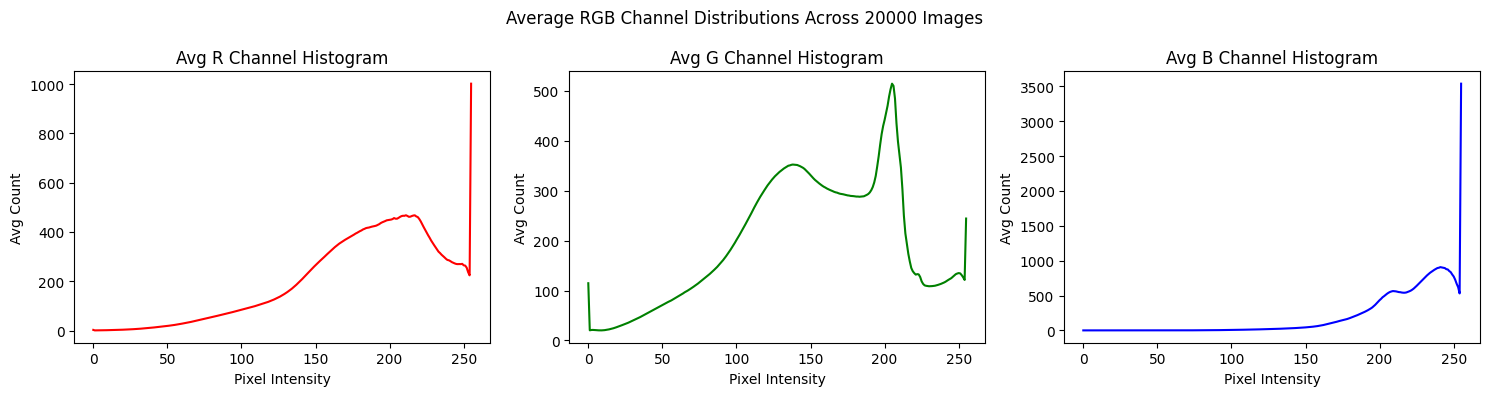

In [22]:
# Number of images to analyze
num_images = 20000

# Initialize histogram bins for RGB channels
r_hist = np.zeros(256)
g_hist = np.zeros(256)
b_hist = np.zeros(256)

count = 0

# Unbatch dataset and loop through individual images
for image, _ in train_ds.unbatch():
    if count >= num_images:
        break
    img = image.numpy().astype("uint8")
    r_hist += np.histogram(img[:, :, 0].flatten(), bins=256, range=(0, 256))[0]
    g_hist += np.histogram(img[:, :, 1].flatten(), bins=256, range=(0, 256))[0]
    b_hist += np.histogram(img[:, :, 2].flatten(), bins=256, range=(0, 256))[0]
    count += 1

# Plot the averaged histograms
colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 4))
for i, (hist, color) in enumerate(zip([r_hist, g_hist, b_hist], colors)):
    plt.subplot(1, 3, i + 1)
    plt.plot(hist / num_images, color=color)
    plt.title(f"Avg {color.upper()} Channel Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Avg Count")

plt.suptitle(f"Average RGB Channel Distributions Across {num_images} Images")
plt.tight_layout()
plt.show()


### RGB Channel Distribution Across 20,000 Images

To gain a broader understanding of the dataset's color profile, we analyzed the average pixel intensity histograms for each RGB channel across 20,000 training images. This approach helps identify staining consistency, color imbalances, and potential preprocessing needs.

- **Red Channel**: Displays a strong skew toward high intensity values, peaking at 255. This indicates a prevalence of bright red regions, likely from background areas or eosin staining, which appears pink/red in H&E slides.

- **Green Channel**: Shows a more balanced distribution, with multiple peaks across the mid to high intensity range. This suggests moderate variation in tissue content and structural complexity captured in green tones.

- **Blue Channel**: Like the red channel, the blue channel shows a dominant spike near 255. Whicch makes snese for H&E stained histology, where hematoxylin results in deep blue and purple coloration in nuclei.

These histograms confirm that the dataset contains strong and consistent color features reflective of H&E staining. The visible color separation supports the model’s ability to learn discriminative features. However, the sharp intensity peaks particularly in red and blue could cause the model to overfit to color intensity rather than structural patterns.